<a href="https://colab.research.google.com/github/WestChaeVI/CNN-models/blob/main/models/VGGnet(72.6%25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGGNet (val acc : 72.6 %)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/CV_seminar_project

/content/drive/MyDrive/CV_seminar_project


In [4]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu' # device 배정
torch.manual_seed(42)
if device == 'cuda':
  torch.cuda.manual_seed_all(42)
device

'cuda'

In [5]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
from tensorflow.keras.optimizers import Adam,SGD
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

# Preparing Dataset

In [6]:
from sklearn.utils import shuffle

def get_images(root_path):
    Images = []
    Labels = []  # 0:'dolphin', 1:'shark', 2:'whale'
    label = 0
    
    for labels in os.listdir(root_path):

      if labels == 'dolphin':
          label = 0
      elif labels == 'shark':
          label = 1
      elif labels == 'whale':
          label = 2
      
      
      for image_file in os.listdir(root_path + '/' + labels):
          image = cv2.imread(root_path+ '/' + labels + '/' + image_file) 
          image = cv2.resize(image,(224,224),interpolation=cv2.INTER_AREA) 
          Images.append(image)
          Labels.append(label)

    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

In [7]:
root_path = '/content/drive/MyDrive/CV_seminar_project/original'
Images,Labels = get_images(root_path)
Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

# Model (VGGNet19)

In [8]:
model = Models.Sequential()

model.add(Layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3), kernel_initializer='he_normal'))
model.add(Layers.BatchNormalization())
model.add(Layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu', kernel_initializer='he_normal'))
model.add(Layers.BatchNormalization())

model.add(Layers.MaxPool2D(3,3))

    
model.add(Layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu', kernel_initializer='he_normal'))
model.add(Layers.BatchNormalization())
model.add(Layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu', kernel_initializer='he_normal'))
model.add(Layers.BatchNormalization())
model.add(Layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu', kernel_initializer='he_normal'))
model.add(Layers.BatchNormalization())

model.add(Layers.MaxPool2D(3,3))


model.add(Layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding = 'same', kernel_initializer='he_normal'))
model.add(Layers.BatchNormalization())
model.add(Layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding = 'same', kernel_initializer='he_normal'))
model.add(Layers.BatchNormalization())
model.add(Layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding = 'same', kernel_initializer='he_normal'))
model.add(Layers.BatchNormalization())

model.add(Layers.MaxPool2D(3,3))


model.add(Layers.GlobalAveragePooling2D())
model.add(Layers.Dense(200,activation='relu', kernel_initializer='he_normal'))
model.add(Layers.Dropout(rate=0.8))
model.add(Layers.Dense(3,activation='softmax')) # Fine Tuning 

model.compile(optimizer=Optimizer.Adam(lr=0.0005),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                        

# Train

In [9]:
trained = model.fit(Images,Labels,epochs=100,validation_split=0.20)

Epoch 1/100
33/33 [==============================] - 20s 163ms/step - loss: 1.9915 - accuracy: 0.3975 - val_loss: 38.2048 - val_accuracy: 0.3878
Epoch 2/100
33/33 [==============================] - 4s 116ms/step - loss: 1.4442 - accuracy: 0.3908 - val_loss: 7.8179 - val_accuracy: 0.3878
Epoch 3/100
33/33 [==============================] - 4s 117ms/step - loss: 1.2114 - accuracy: 0.4261 - val_loss: 1.3189 - val_accuracy: 0.3954
Epoch 4/100
33/33 [==============================] - 4s 113ms/step - loss: 1.1612 - accuracy: 0.4261 - val_loss: 1.1372 - val_accuracy: 0.3878
Epoch 5/100
33/33 [==============================] - 4s 113ms/step - loss: 1.1160 - accuracy: 0.4414 - val_loss: 0.9624 - val_accuracy: 0.4905
Epoch 6/100
33/33 [==============================] - 4s 119ms/step - loss: 1.0541 - accuracy: 0.4786 - val_loss: 1.0142 - val_accuracy: 0.4981
Epoch 7/100
33/33 [==============================] - 4s 114ms/step - loss: 1.0295 - accuracy: 0.4833 - val_loss: 0.9428 - val_accuracy: 0.51

In [10]:
best_epoch = []
for i, acc in enumerate(trained.history['val_accuracy']):
  if acc == max(trained.history['val_accuracy']):
      best_epoch.append(i+1)
best_epoch = best_epoch[0]
best_epoch

85

# Acc & Loss Plot

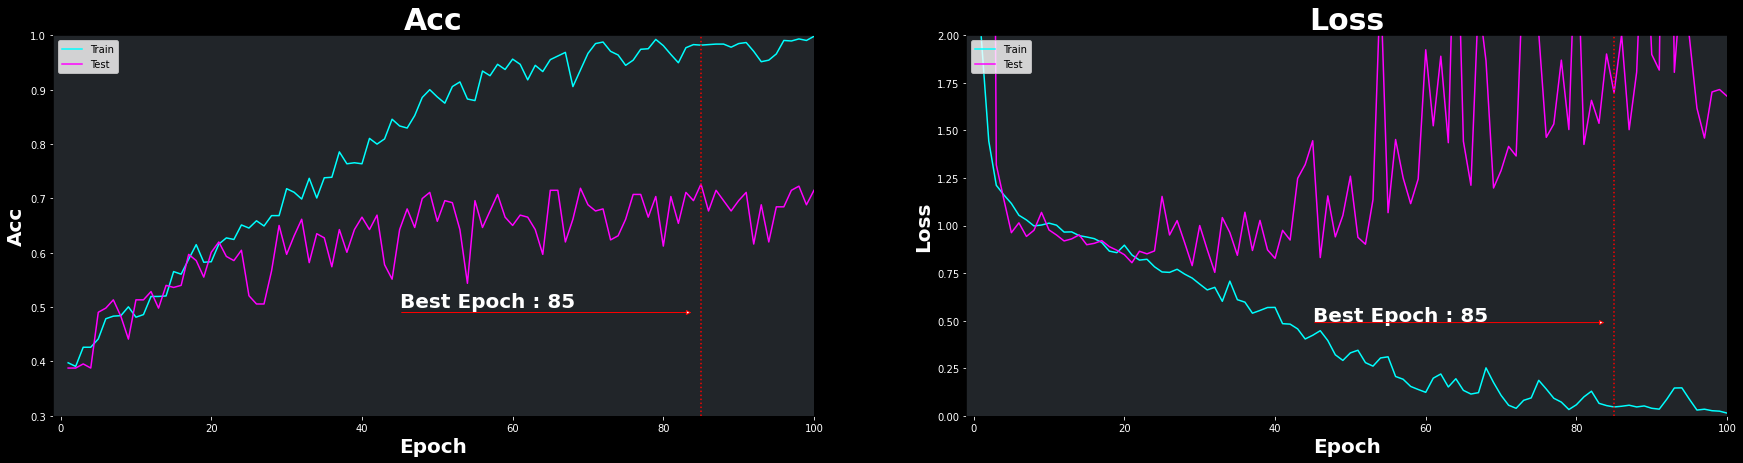

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,7),facecolor='black')
plt = fig.subplots(1,2)

train_score = {'Acc':trained.history['accuracy'], 'Loss':trained.history['loss']}
valid_score = {'Acc':trained.history['val_accuracy'], 'Loss':trained.history['val_loss']}

for i in range(len(train_score)):
  plt[i].plot(np.arange(1,len(trained.history['accuracy'])+1), train_score[list(train_score.keys())[i]], c='cyan')
  plt[i].plot(np.arange(1,len(trained.history['accuracy'])+1), valid_score[list(valid_score.keys())[i]],c='magenta')
  plt[i].set_title(list(valid_score.keys())[i],color='white', fontweight='bold', fontsize=30)
  plt[i].set_ylabel(list(valid_score.keys())[i],color='white', fontweight='bold', fontsize=20)
  plt[i].set_xlabel('Epoch',color='white', fontweight='bold', fontsize=20)
  if i == 0:
    plt[i].set_ylim([0.3,1])
  else:
    plt[i].set_ylim([0,2])

  plt[i].set_xlim([-1, 100])
  plt[i].legend(['Train', 'Test'], loc='upper left')
  plt[i].axvline(x=best_epoch, color='r', linestyle=':')
  plt[i].tick_params(axis='x', colors='white')
  plt[i].tick_params(axis='y', colors='white')
  plt[i].patch.set_facecolor('#212529')
  arrowprops = dict(fc='white', color='red',arrowstyle="-|>")
  font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
  plt[i].text(best_epoch-40,0.5, "Best Epoch : {}".format(best_epoch), 
              fontdict= {'color':  'white','weight': 'bold','size': 20})
  plt[i].annotate("",xy=(best_epoch-1, 0.49),
                  xytext=(best_epoch-40,0.49),
                  arrowprops=arrowprops)

In [13]:
print('100 epcohs 중 validset 기준 accuracy {} % 성능을 달성하였습니다.'.format(round(max(trained.history['val_accuracy']),3)*100))

100 epcohs 중 validset 기준 accuracy 72.6 % 성능을 달성하였습니다.
